# Assignment 8: Implement a Neural Network for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

In this assignment, you will implement a feedforward neural network that performs sentiment classification.
You will complete the following tasks:
    
1. Build your DataFrame and define your ML problem:
    * Load the book review data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Transform the training and test text data using a TF-IDF vectorizer. 
5. Construct a neural network
6. Train the neural network
7. Compare the neural network model's performance on the training and validation data.
8. Improve the model's generalization performance.
9. Evaluate the model's performance on the test data.
10. Experiment with ways to improve the model.

For this assignment, use the demo <i>Transforming Text into Features for Sentiment Analysis</i> that is contained in this unit as a reference.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem


#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "bookReviews.csv" that is located in a folder named "data_NLP".

In [2]:
filename = os.path.join(os.getcwd(), "data_NLP", "bookReviews.csv")
df = pd.read_csv(filename)

#### Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [3]:
print("# of rows: " + str(df.shape[0]))
print("# of columns: " + str(df.shape[1]))
print("first ten rows: ")
df.head()

# of rows: 1973
# of columns: 2
first ten rows: 


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


#### Define the Label

This is a binary classification problem in which we will predict whether a book review is a positive or negative one. The label is the `Positive Review` column.

#### Identify Features

We only have one feature. The feature is the `Review` column.


## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`. Assign the label to the variable `y`. Assign the feature to the variable `X`. 

In [4]:
y = df['Positive Review']
X = df['Review']

## Part 3. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 25 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape

(1479,)

## Part 4:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, you will transform the features into numerical vectors using `TfidfVectorizer`. 


<b>Task:</b> Follow the steps to complete the code in the cell below:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.

2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.

3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.

4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [6]:
# 1. Create a TfidfVectorizer object 
#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [7]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

8883


## Part 5: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers, with 64, 32, and 16 units (number of nodes) respectively. Each layer will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have 1 unit. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

Use the same approach you have taken in this course to construct a feedforward neural network model using Keras. Do the following:

* Use the Keras [`Sequential` class](https://keras.io/api/models/sequential/#sequential-class) to group a stack of layers. This will be our neural network model object. Name your neural network model object ```nn_model```.    
* Use the [`InputLayer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) to create the input layer. 
* Use the [`Dense` class](https://keras.io/api/layers/core_layers/dense/) to create each hidden layer and the output layer.
* After creating each layer, add it to the neural network model object ```nn_model```.


In [8]:
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_shape = (vocabulary_size,)  # Replace vocabulary_size with your actual vocabulary size
nn_model.add(keras.layers.InputLayer(input_shape=input_shape))


# 3. Create the first hidden layer and add it to the model object:
nn_model.add(keras.layers.Dense(units=64, activation='relu'))


# 4. Create the second layer and add it to the model object:
nn_model.add(keras.layers.Dense(units=32, activation='relu'))


# 5. Create the third layer and add it to the model object:
nn_model.add(keras.layers.Dense(units=16, activation='relu'))


# 6. Create the output layer and add it to the model object:
nn_model.add(keras.layers.Dense(units=1, activation='sigmoid'))


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                568576    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 571,201
Trainable params: 571,201
Non-trainable params: 0
_________________________________________________________________


### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1. Assign the result to the variable`sgd_optimizer`.

In [9]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Since our output will be a normalized probability between 0 and 1, specify that `from_logits` is `False`. Assign the result to the variable  `loss_fn`.

In [10]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `nn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [11]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 6. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [12]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> In the code cell below, fit the neural network model to the vectorized training data. Call the `fit()` method on the model object `nn_model` and specify the following arguments:

1. The training data `X_train_tfidf` and `y_train` as arguments. Note that `X_train_tfidf` is currently of type sparce matrix. The Keras `fit()` method requires that input data be of specific types. One type that is allowed is a NumPy array. Convert `X_train_tfidf` to a NumPy array using the `toarray()` method.
2. Use the `epochs` parameter and assign it the number of epochs.
3. Use the `verbose` parameter and assign it the value of  0.
4. We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
5. Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]`  


Save the results to the variable `history`.
  
<b>Note</b>: This may take a while to run.

In [13]:
t0 = time.time() # start time

num_epochs = 55

history = nn_model.fit( X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])
t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

# epoch 5/55 - 0.5507, epoch 55/55 - 0.7939
# epoch 5/30 - 0.7939, epoch 30/30 - 0.7939

Epoch [5/ 55], Loss: 0.6883, Accuracy: 0.5892, Val_loss: 0.6898, Val_accuracy: 0.5304
Epoch [10/ 55], Loss: 0.6286, Accuracy: 0.7675, Val_loss: 0.6774, Val_accuracy: 0.4865
Epoch [15/ 55], Loss: 0.5110, Accuracy: 0.7168, Val_loss: 0.7005, Val_accuracy: 0.5405
Epoch [20/ 55], Loss: 0.2867, Accuracy: 0.8884, Val_loss: 0.4450, Val_accuracy: 0.7770
Epoch [25/ 55], Loss: 0.2726, Accuracy: 0.8969, Val_loss: 0.4455, Val_accuracy: 0.8074
Epoch [30/ 55], Loss: 0.0137, Accuracy: 1.0000, Val_loss: 0.4861, Val_accuracy: 0.8074
Epoch [35/ 55], Loss: 0.0051, Accuracy: 1.0000, Val_loss: 0.5311, Val_accuracy: 0.8108
Epoch [40/ 55], Loss: 0.0028, Accuracy: 1.0000, Val_loss: 0.5629, Val_accuracy: 0.7905
Epoch [45/ 55], Loss: 0.0019, Accuracy: 1.0000, Val_loss: 0.5838, Val_accuracy: 0.8074
Epoch [50/ 55], Loss: 0.0014, Accuracy: 1.0000, Val_loss: 0.6016, Val_accuracy: 0.8041
Epoch [55/ 55], Loss: 0.0011, Accuracy: 1.0000, Val_loss: 0.6177, Val_accuracy: 0.7872
Elapsed time: 3.89s


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

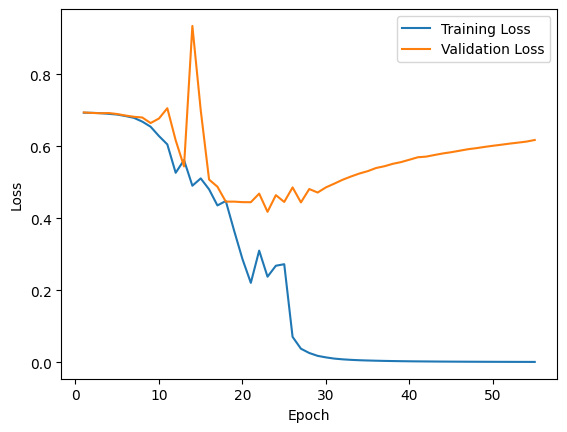

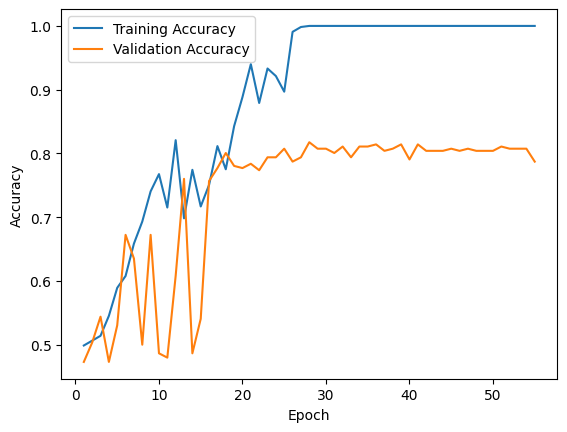

In [15]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 7. Evaluate the Model's Performance

### Improve Model's Performance and Prevent Overfitting 

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform as well on new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize to new data. Our goal is to have our training and validation accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way of adding randomization and preventing nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

<b>Task:</b> 

1. Tweak the variable `num_epochs` above and restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.

2. Add Keras `Dropout` layers after one or all hidden layers. Add the following line of code after you add a hidden layer to your model object:  `nn_model.add(keras.layers.Dropout(.25))`. The parameter `.25` is the fraction of the nodes to drop. You can experiment with this value as well. Restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.


<b>Analysis:</b> 
In the cell below, specify the different approaches you used to reduce overfitting and summarize which configuration led to the best generalization performance.

Did changing the number of epochs prevent overfitting? Which value of `num_epochs` yielded the closest training and validation accuracy score? 

Did adding dropout layers prevent overfitting? How so? Did it also improve the accuracy score when evaluating the validation data? How many dropout layers did you add and which fraction of nodes did you drop? 

Record your findings in the cell below.

## Work is below
* The models trained without dropout showed that increasing the number of epochs led to diminishing returns and eventually overfitting. For instance, a model trained for 100 epochs showed significant overfitting, with validation accuracy and loss deteriorating despite low training loss and high accuracy
* The models using dropout layers demonstrated more stability with higher numbers of epochs. Dropout helped in minimizing overfitting by regularly ridding of nodes during training which forced the model to generalize better. However, very high epoch counts still risked overfitting, but the model managed to maintain better validation performance compared to models without dropout.

Epoch [5/ 10], Loss: 0.6883, Accuracy: 0.5469, Val_loss: 0.6864, Val_accuracy: 0.5642
Epoch [10/ 10], Loss: 0.6353, Accuracy: 0.7346, Val_loss: 0.6404, Val_accuracy: 0.7635
Elapsed time for 10 epochs: 1.04s
--------------------------------------------------
Epoch [5/ 30], Loss: 0.6866, Accuracy: 0.5630, Val_loss: 0.6908, Val_accuracy: 0.4730
Epoch [10/ 30], Loss: 0.6266, Accuracy: 0.7743, Val_loss: 0.6353, Val_accuracy: 0.7736
Epoch [15/ 30], Loss: 0.4844, Accuracy: 0.7785, Val_loss: 0.4852, Val_accuracy: 0.7736
Epoch [20/ 30], Loss: 0.3329, Accuracy: 0.8453, Val_loss: 0.4343, Val_accuracy: 0.8074
Epoch [25/ 30], Loss: 0.1432, Accuracy: 0.9594, Val_loss: 0.4225, Val_accuracy: 0.8074
Epoch [30/ 30], Loss: 0.0135, Accuracy: 1.0000, Val_loss: 0.4912, Val_accuracy: 0.8108
Elapsed time for 30 epochs: 2.19s
--------------------------------------------------
Epoch [5/ 50], Loss: 0.6898, Accuracy: 0.5545, Val_loss: 0.6890, Val_accuracy: 0.5270
Epoch [10/ 50], Loss: 0.6555, Accuracy: 0.7134, Va

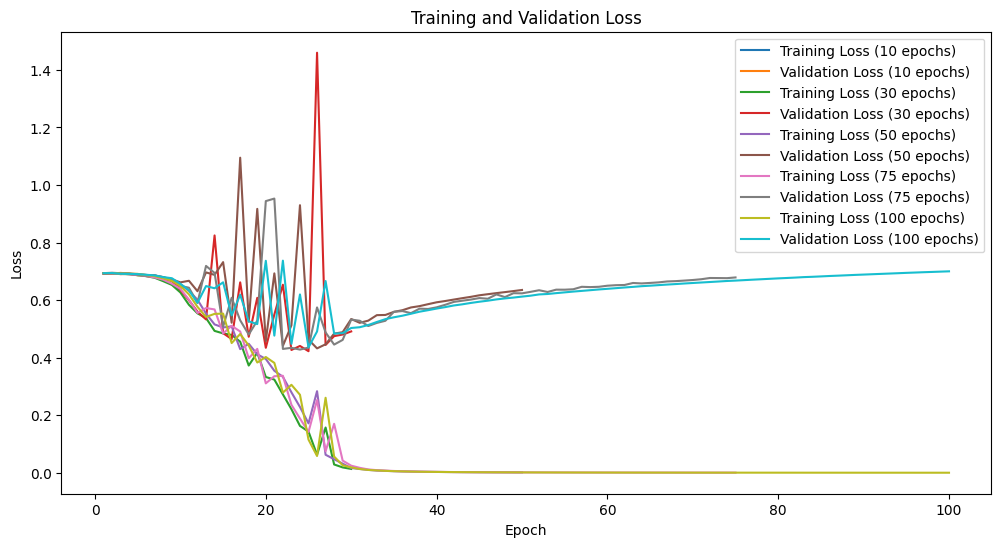

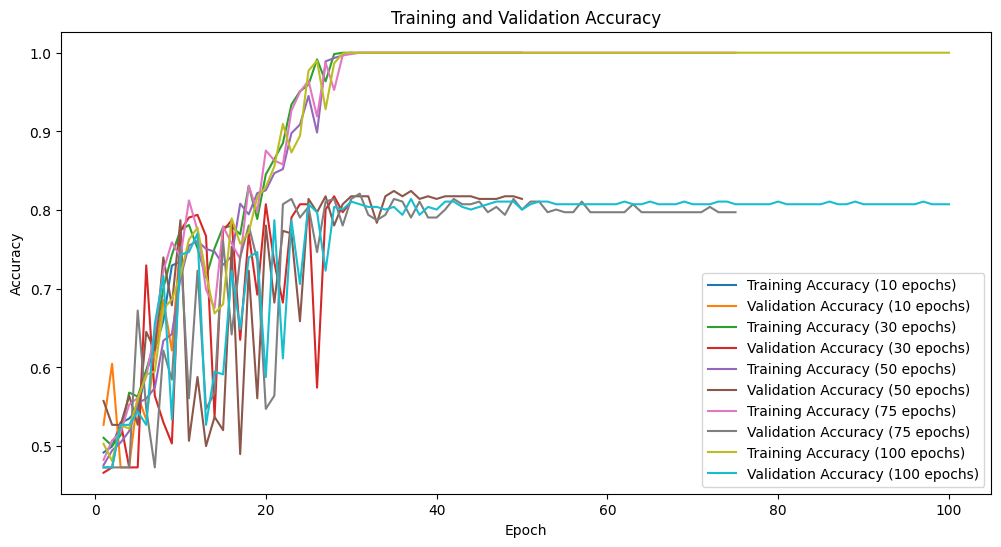

In [16]:
def testing_model(input_shape):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(units=32, activation='relu'))
    model.add(keras.layers.Dense(units=16, activation='relu'))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    return model

epoch_values = [10, 30, 50, 75, 100]

history_dict = {}


# Loop through each epoch value
for num_epochs in epoch_values:
    nn_model = testing_model(input_shape=(vocabulary_size,))  
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])
  
    t0 = time.time()  
    history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])
    t1 = time.time()  

    history_dict[num_epochs] = history
    
    print(f'Elapsed time for {num_epochs} epochs: %.2fs' % (t1-t0))
    
    print("-" * 50)

plt.figure(figsize=(12, 6))
for num_epochs, hist in history_dict.items():
    plt.plot(range(1, num_epochs + 1), hist.history['loss'], label=f'Training Loss ({num_epochs} epochs)')
    plt.plot(range(1, num_epochs + 1), hist.history['val_loss'], label=f'Validation Loss ({num_epochs} epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(12, 6))
for num_epochs, hist in history_dict.items():
    plt.plot(range(1, num_epochs + 1), hist.history['accuracy'], label=f'Training Accuracy ({num_epochs} epochs)')
    plt.plot(range(1, num_epochs + 1), hist.history['val_accuracy'], label=f'Validation Accuracy ({num_epochs} epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Epoch [5/ 10], Loss: 0.6911, Accuracy: 0.5300, Val_loss: 0.6905, Val_accuracy: 0.5743
Epoch [10/ 10], Loss: 0.6694, Accuracy: 0.6382, Val_loss: 0.6743, Val_accuracy: 0.6284
Elapsed time for 10 epochs: 1.08s
--------------------------------------------------
Epoch [5/ 30], Loss: 0.6809, Accuracy: 0.5883, Val_loss: 0.6801, Val_accuracy: 0.6824
Epoch [10/ 30], Loss: 0.5761, Accuracy: 0.7405, Val_loss: 0.6532, Val_accuracy: 0.5068
Epoch [15/ 30], Loss: 0.4746, Accuracy: 0.7844, Val_loss: 0.4665, Val_accuracy: 0.8074
Epoch [20/ 30], Loss: 0.3039, Accuracy: 0.8800, Val_loss: 0.4746, Val_accuracy: 0.7804
Epoch [25/ 30], Loss: 0.2400, Accuracy: 0.9222, Val_loss: 0.8729, Val_accuracy: 0.6520
Epoch [30/ 30], Loss: 0.2714, Accuracy: 0.9172, Val_loss: 0.4260, Val_accuracy: 0.8074
Elapsed time for 30 epochs: 2.25s
--------------------------------------------------
Epoch [5/ 50], Loss: 0.6899, Accuracy: 0.5410, Val_loss: 0.6921, Val_accuracy: 0.4730
Epoch [10/ 50], Loss: 0.6577, Accuracy: 0.6560, Va

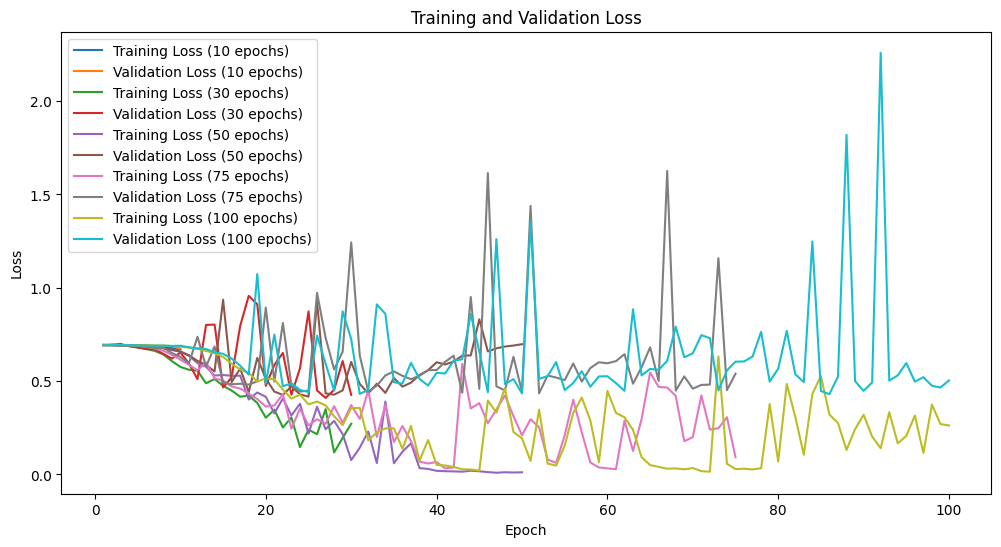

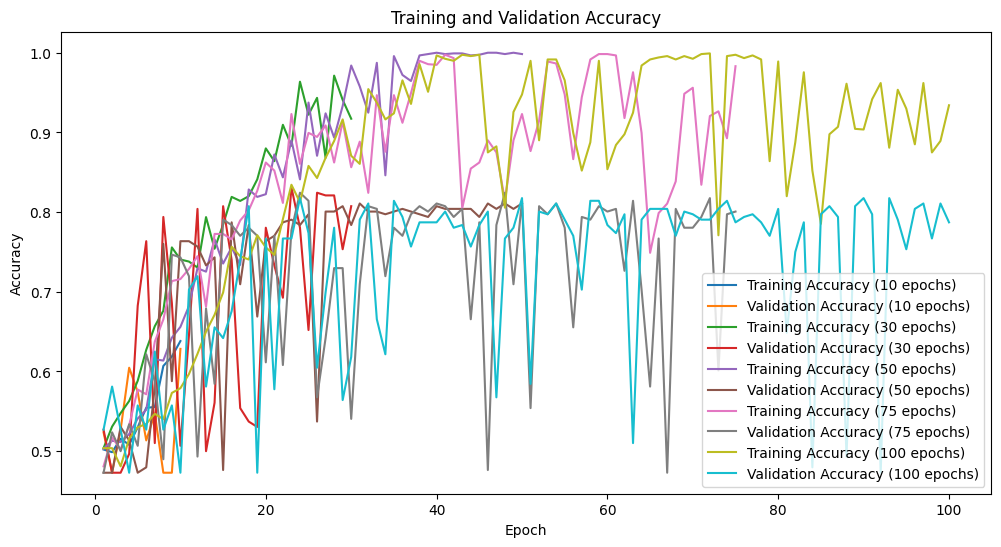

In [17]:
def testing_model_dropout(input_shape, dropout_rate=0.25):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(units=32, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(units=16, activation='relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    return model

epoch_values = [10, 30, 50, 75, 100]

history_dict = {}


# Loop through each epoch value
for num_epochs in epoch_values:
    nn_model = testing_model_dropout(input_shape=(vocabulary_size,))  
    
    sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])
  
    t0 = time.time()  
    history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])
    t1 = time.time()  

    history_dict[num_epochs] = history
    
    print(f'Elapsed time for {num_epochs} epochs: %.2fs' % (t1-t0))
    
    print("-" * 50)

plt.figure(figsize=(12, 6))
for num_epochs, hist in history_dict.items():
    plt.plot(range(1, num_epochs + 1), hist.history['loss'], label=f'Training Loss ({num_epochs} epochs)')
    plt.plot(range(1, num_epochs + 1), hist.history['val_loss'], label=f'Validation Loss ({num_epochs} epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(12, 6))
for num_epochs, hist in history_dict.items():
    plt.plot(range(1, num_epochs + 1), hist.history['accuracy'], label=f'Training Accuracy ({num_epochs} epochs)')
    plt.plot(range(1, num_epochs + 1), hist.history['val_accuracy'], label=f'Validation Accuracy ({num_epochs} epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### Evaluate the Performance on the Test Set

Now that you have improved the model, let's evaluate its performance on our test data and compare the results.

<b>Task:</b> In the code cell below, call the  `evaluate()` method on the model object `nn_model`. Specify `X_test_tfidf` and `y_test` as arguments. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [18]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 763us/step - loss: 0.5016 - accuracy: 0.7996
Loss:  0.5016196370124817 Accuracy:  0.7995951175689697


### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set and receive probability predictions for every example in the test set (these values will be between 0.0 and 1.0). We will then inspect the results for the first 20 examples &mdash; We will apply a threshold to determine the predicted class for every example; we will use a threshold of 0.5. This means that if the probability is greater than 0.5, we will assume the book review is good. We will then print the actual class labels contained in `y_test` to see if our model is producing accurate predictions.

<b>Task: </b> In the code cell below, do the following:

1. Call the  `predict()` method on the model object `nn_model`. Specify `X_test_tfidf` as an argument. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. Save the results to the array `probability_predictions`.
2. Loop through the first 20 items in `probability_predictions`. These correspond to the predicted probabilities for the first 20 examples in our test set. For every item, check if the probability is greater than 0.5. If so, output:
* the probability value in `probability_predictions`
* the corresponding label in `y_test`. Note: convert the series `y_test` using `y_test.to_numpy()` before indexing into it.

Inspect the results. How is our model performing? Is our model properly predicting whether the book reviews are good or bad reviews?

In [19]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

y_test_array = y_test.to_numpy()

print("Predictions for the first 20 examples:")

for i in range(20):
    probability = probability_predictions[i][0]  # Extract the scalar probability value
    label = y_test_array[i]
    
    if probability > 0.5:
        print(f"Probability: {probability:.4f}, Actual Label: {label}")

Predictions for the first 20 examples:
Probability: 0.9482, Actual Label: True
Probability: 0.9505, Actual Label: True
Probability: 0.8654, Actual Label: True
Probability: 0.9847, Actual Label: True
Probability: 0.6340, Actual Label: True
Probability: 0.9746, Actual Label: True
Probability: 0.9473, Actual Label: True


Let's check a few of the original book review texts to get a further glimpse into how our model is performing.

In [20]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

I have read several of Hiaasen's books and loved them.  They were very funny.  This one is not.  It is an endless description of naked strippers.  I found the main character, Erin, to be very unappealing.  She is just so stupid.  Her problems are all of her own creation.  And she is not funny.  I think you have to be a man to like this book.  I, as a woman, just found it exceedingly boring.  I kept waiting for it to get funny.  It never did


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [21]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

A little less psycho babble and a bit more logistical information would have suited me better.  Ms. Cantrell spends the majority of the book being a relationship/marriage counselor, and though it's true issues become larger in smaller spaces, there are more issues for women cruisers than just their relationship dynamics.  As I said, practical logistical information would have suited me better.


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [22]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

Miller knows his subjects (the people) and his subject (their desperation) with a clarity and fearlessness that most people would prefer to avoid.  Viewing his photographs are no easier a task than living  wholly and honestly.  Skinheads, speedfreaks, Tenderloin whores, friends and neighbors.  Lucid, terrifying, and ultimately beautiful photographs from a man of the same qualities


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [23]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

I was at the airport, getting ready to fly out to Cali and I found this book in the airport gift shop- I thought what a stroke of luck I had getting a Stephen King title at such a juncture... I'm a huge  fan.
Despite the fact that I started and finished the book exactly as the plane took off and landed, I was sorely disappointed.  Much ado about nothing would be an overstatement


Prediction: Is this a good review? False

Actual: Is this a good review? False



## Part 8: Analysis

Experiment with the vectorizer and neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit your vectorizer using different document frequency values and different n-gram ranges. When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.

Record your findings in the cell below.


16/16 [==============================] - 0s 763us/step - loss: 0.5016 - accuracy: 0.7996
Loss:  0.5016196370124817 Accuracy:  0.7995951175689697

I tweaked the TfidfVectorizer by adjusting document frequency values and incorporating n-grams. Specifically, I set min_df to 5 and used ngram_range=(1, 2) to include both single words and bigrams in the feature set. This change gave the model more context by capturing common word pairs, which improved the model’s accuracy.